In [2]:
import pandas as pd
import numpy as np
import nasdaqdatalink
from prophet import Prophet
import matplotlib.pyplot as plt

In [3]:
naturalgas = pd.read_csv("C:/Users/Admin/Desktop/Data Capstone/Natural_Gas_Price.csv")
naturalgas

,Date,Value
0,2000-01-04,2.176
1,2000-01-05,2.168
2,2000-01-06,2.196
3,2000-01-07,2.173
4,2000-01-10,2.216
...,...,...
5559,2022-02-02,5.501
5560,2022-02-03,4.888
5561,2022-02-04,4.572
5562,2022-02-07,4.232


In [4]:
naturalgas['Date'] = pd.to_datetime(naturalgas['Date'])

In [5]:
naturalgas.columns=['ds','y']

In [6]:
m = Prophet(weekly_seasonality=False, changepoint_range=1,changepoint_prior_scale=0.75)

In [7]:
m.fit(naturalgas)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
5924,2023-02-04
5925,2023-02-05
5926,2023-02-06
5927,2023-02-07
5928,2023-02-08


In [9]:
forecast = m.predict(future)

In [10]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-04,1.767016,0.590157,3.126416,1.767016,1.767016,0.134630,0.134630,0.134630,0.134630,0.134630,0.134630,0.0,0.0,0.0,1.901645
1,2000-01-05,1.782284,0.612463,3.181665,1.782284,1.782284,0.124644,0.124644,0.124644,0.124644,0.124644,0.124644,0.0,0.0,0.0,1.906929
2,2000-01-06,1.797553,0.695545,3.188446,1.797553,1.797553,0.116012,0.116012,0.116012,0.116012,0.116012,0.116012,0.0,0.0,0.0,1.913565
3,2000-01-07,1.812822,0.698456,3.218236,1.812822,1.812822,0.108664,0.108664,0.108664,0.108664,0.108664,0.108664,0.0,0.0,0.0,1.921486
4,2000-01-10,1.858627,0.719499,3.273194,1.858627,1.858627,0.093198,0.093198,0.093198,0.093198,0.093198,0.093198,0.0,0.0,0.0,1.951826


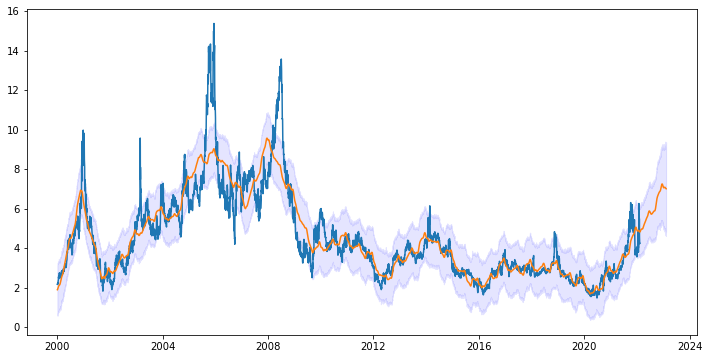

In [11]:
fig, ax = plt.subplots(figsize=(12,6))

x = naturalgas['ds']
y = naturalgas['y']

x_pred = forecast['ds']
yhat = forecast['yhat']

yhat_upper = forecast['yhat_upper']
yhat_lower = forecast['yhat_lower']

ax.plot(x,y)
ax.plot(x_pred,yhat)
ax.fill_between(x_pred, yhat_lower, yhat_upper, color='b', alpha=.1)

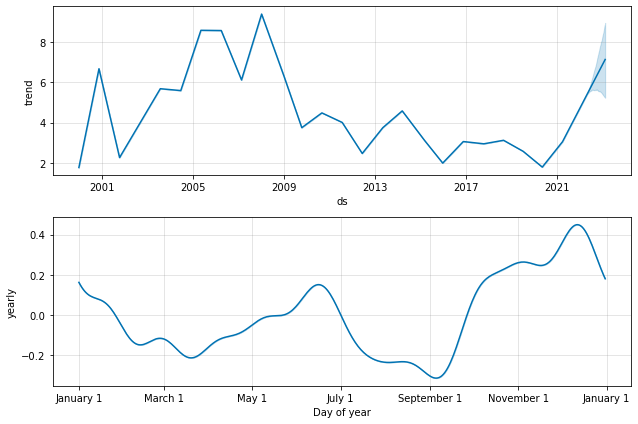

In [12]:
fig2 = m.plot_components(forecast)